In [1]:
pip install pandas numpy matplotlib statsmodels


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Carregar as tabelas do NHANES no formato XPT
url_demographics = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.XPT' # Changed .htm to .XPT
url_body_measures = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.XPT' # Changed .htm to .XPT
url_blood_pressure = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.XPT' # Changed .htm to .XPT

# Carregando os dados
demographics = pd.read_sas(url_demographics)
body_measures = pd.read_sas(url_body_measures)
blood_pressure = pd.read_sas(url_blood_pressure)

# Merge dos dados usando o identificador SEQN
merged_data = demographics.merge(body_measures, on='SEQN').merge(blood_pressure, on='SEQN')

# Seleção das colunas de interesse: idade, IMC e pressão arterial sistólica
data_filtered = merged_data[['RIDAGEYR', 'BMXBMI', 'BPXSY1']]

# Filtrar participantes com idade entre 20 e 60 anos
data_filtered = data_filtered[(data_filtered['RIDAGEYR'] >= 20) & (data_filtered['RIDAGEYR'] <= 60)]

# Remover dados faltantes
data_filtered = data_filtered.dropna()

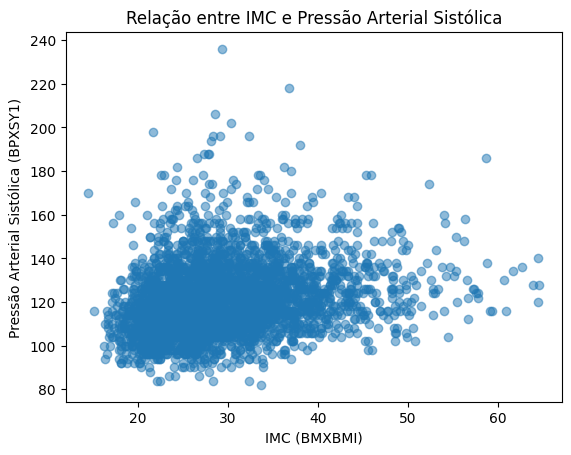

In [7]:
# Scatter plot entre IMC e PAS
plt.scatter(data_filtered['BMXBMI'], data_filtered['BPXSY1'], alpha=0.5)
plt.title('Relação entre IMC e Pressão Arterial Sistólica')
plt.xlabel('IMC (BMXBMI)')
plt.ylabel('Pressão Arterial Sistólica (BPXSY1)')
plt.show()


In [16]:
# Variável dependente (y) e independente (X)
X = data_filtered['BMXBMI']
y = data_filtered['BPXSY1']

# Adicionar constante ao modelo
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Resumo do modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 BPXSY1   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     192.0
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           1.45e-42
Time:                        18:54:56   Log-Likelihood:                -14702.
No. Observations:                3536   AIC:                         2.941e+04
Df Residuals:                    3534   BIC:                         2.942e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.4908      1.085     98.166      0.0

In [18]:
# Previsão da pressão arterial (y_pred)
y_pred = model.predict(X)

# Cálculo das métricas de avaliação
r2 = model.rsquared
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R²: {r2}")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")


R²: 0.051540728499060995
Erro Médio Absoluto (MAE): 11.621481516741891
Erro Quadrático Médio (MSE): 239.35468049096247


In [19]:
demographics = pd.read_sas(url_demographics, format='xport')
body_measures = pd.read_sas(url_body_measures, format='xport')
blood_pressure = pd.read_sas(url_blood_pressure, format='xport')


In [20]:
print(demographics.head())
print(body_measures.head())
print(blood_pressure.head())


      SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  83732.0       9.0       2.0       1.0      62.0       NaN       3.0   
1  83733.0       9.0       2.0       1.0      53.0       NaN       3.0   
2  83734.0       9.0       2.0       1.0      78.0       NaN       3.0   
3  83735.0       9.0       2.0       2.0      56.0       NaN       3.0   
4  83736.0       9.0       2.0       2.0      42.0       NaN       4.0   

   RIDRETH3  RIDEXMON  RIDEXAGM  ...  DMDHREDU  DMDHRMAR  DMDHSEDU  \
0       3.0       1.0       NaN  ...       5.0       1.0       3.0   
1       3.0       1.0       NaN  ...       3.0       3.0       NaN   
2       3.0       2.0       NaN  ...       3.0       1.0       3.0   
3       3.0       2.0       NaN  ...       5.0       6.0       NaN   
4       4.0       2.0       NaN  ...       4.0       3.0       NaN   

        WTINT2YR       WTMEC2YR  SDMVPSU  SDMVSTRA  INDHHIN2  INDFMIN2  \
0  134671.370419  135629.507405      1.0     125.0      10.0